In [2]:
from PIL import Image
import numpy as np  
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

import ipywidgets as widgets
from ipywidgets import interactive

import glob

import os

In [3]:
tiff_folder = "/SNS/VENUS/IPTS-34969/images/mcp/images/Run_8213/tpx3/"
list_tiff = glob.glob(os.path.join(tiff_folder, "*.tiff"))
list_tiff.sort()

print(f"Number of tiff files: {len(list_tiff)}")

data = np.array([np.array(Image.open(f)) for f in list_tiff])
image = np.sum(data, axis=0)



Number of tiff files: 1500


Text(0.5, 1.0, 'Timepix3 Data')

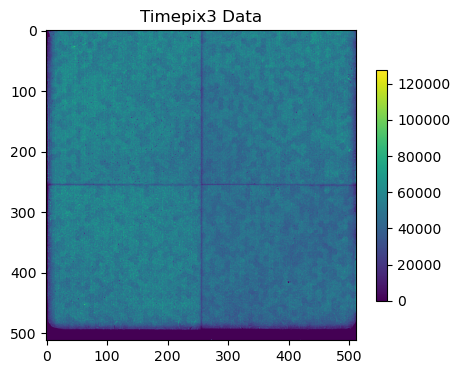

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
im = ax.imshow(image, cmap='viridis')
fig.colorbar(im, ax=ax, shrink=0.6)
ax.set_title('Timepix3 Data')


In [5]:
chip1 = image[0:256, 256:]
chip2 = image[0:256, 0:256]
chip3 = image[256: , 0:256]
chip4 = image[256: , 256:]

Text(0.5, 1.0, 'Chip 4')

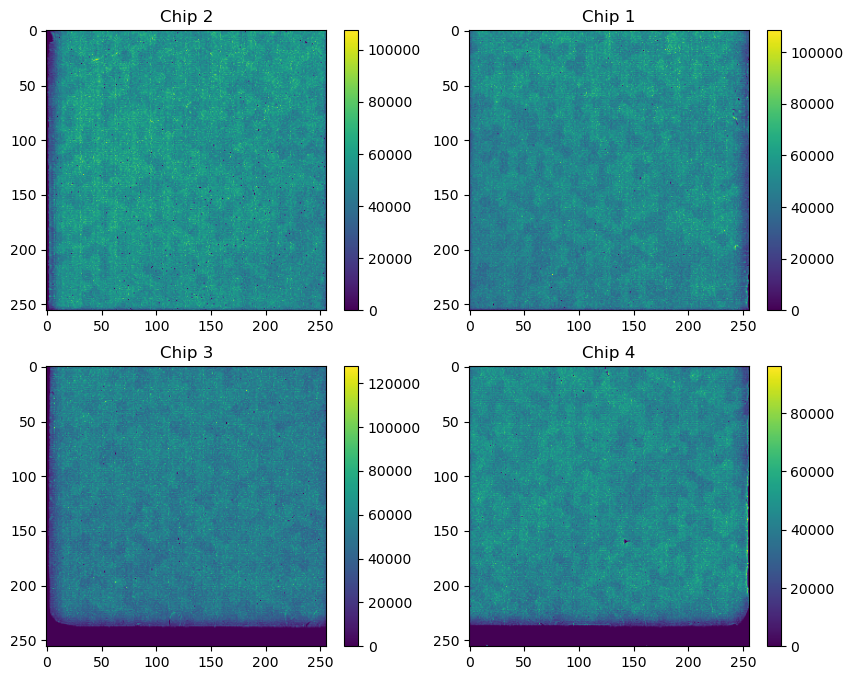

In [6]:
cmap = 'viridis' # 'gray', 'viridis', 'plasma', 'inferno', 'magma', 'cividis'

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
im01 = axs[0, 1].imshow(chip1, cmap=cmap)
fig.colorbar(im01, ax=axs[0, 1])
axs[0, 1].set_title('Chip 1')

im02 = axs[0, 0].imshow(chip2, cmap=cmap)
fig.colorbar(im02, ax=axs[0, 0])
axs[0, 0].set_title('Chip 2')

im03 = axs[1, 0].imshow(chip3, cmap=cmap)
fig.colorbar(im03, ax=axs[1, 0])    
axs[1, 0].set_title('Chip 3')

im04 = axs[1, 1].imshow(chip4, cmap=cmap)
fig.colorbar(im04, ax=axs[1, 1])
axs[1, 1].set_title('Chip 4')


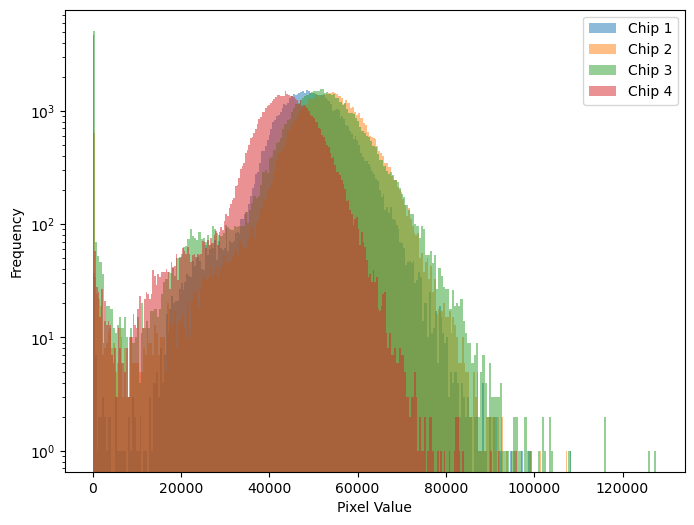

In [7]:
# compare histograms of each chips
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(chip1.ravel(), bins=256, alpha=0.5, label='Chip 1')
ax.hist(chip2.ravel(), bins=256, alpha=0.5, label='Chip 2')
ax.hist(chip3.ravel(), bins=256, alpha=0.5, label='Chip 3')
ax.hist(chip4.ravel(), bins=256, alpha=0.5, label='Chip 4')
ax.set_yscale('log')
ax.set_xlabel('Pixel Value')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

In [8]:
# let's get the statistics of each chip
def chip_stats(chip, stat):
    stat['min'].append(np.min(chip))
    stat['max'].append(np.max(chip))
    stat['mean'].append(np.mean(chip))
    stat['median'].append(np.median(chip))
    stat['std'].append(np.std(chip))
    stat['sum'].append(np.sum(chip))
 
stat = {'min': [], 'max': [], 'mean': [], 'median': [], 'std': [], 'sum': []}
chip_stats(chip1, stat)
chip_stats(chip2, stat)
chip_stats(chip3, stat)
chip_stats(chip4, stat)


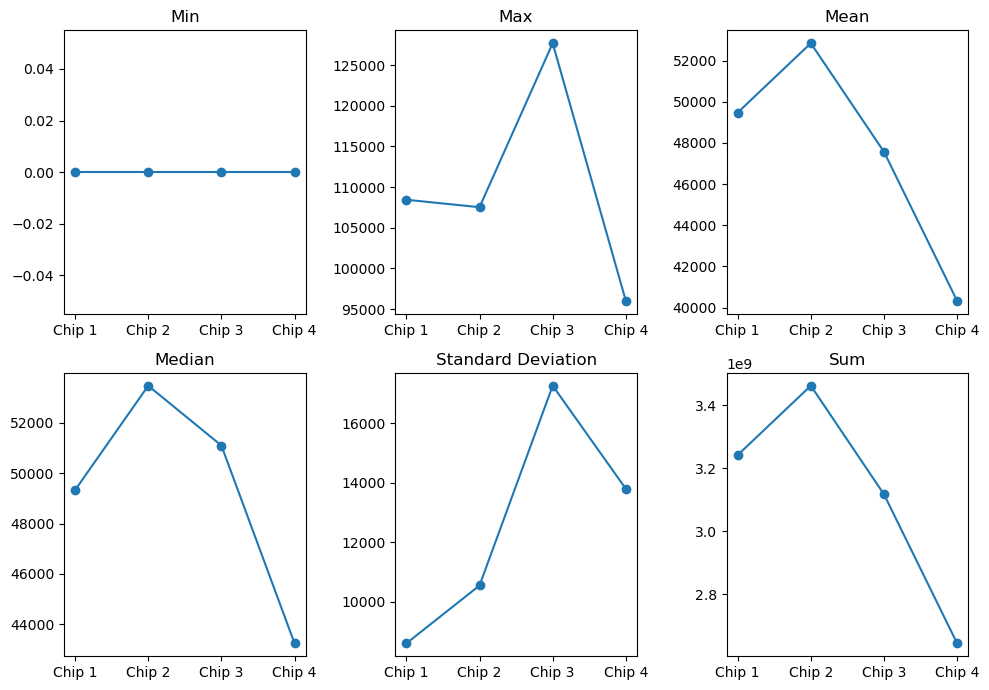

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
axs[0][0].plot(stat['min'], marker='o')
axs[0][0].set_title('Min')
axs[0][0].set_xticks([0, 1, 2, 3])
axs[0][0].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

axs[0][1].plot(stat['max'], marker='o')
axs[0][1].set_title('Max')
axs[0][1].set_xticks([0, 1, 2, 3])
axs[0][1].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

axs[0][2].plot(stat['mean'], marker='o')
axs[0][2].set_title('Mean')
axs[0][2].set_xticks([0, 1, 2, 3])
axs[0][2].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

axs[1][0].plot(stat['median'], marker='o')
axs[1][0].set_title('Median')
axs[1][0].set_xticks([0, 1, 2, 3])
axs[1][0].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

axs[1][1].plot(stat['std'], marker='o')
axs[1][1].set_title('Standard Deviation')
axs[1][1].set_xticks([0, 1, 2, 3])
axs[1][1].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

axs[1][2].plot(stat['sum'], marker='o')
axs[1][2].set_title('Sum')
axs[1][2].set_xticks([0, 1, 2, 3])
axs[1][2].set_xticklabels(['Chip 1', 'Chip 2', 'Chip 3', 'Chip 4'])

plt.tight_layout()


In [10]:
# locate all the dead pixels (value = 0 )
dead_pixels_chip1 = np.where(chip1 == 0)
dead_pixels_chip2 = np.where(chip2 == 0)
dead_pixels_chip3 = np.where(chip3 == 0)
dead_pixels_chip4 = np.where(chip4 == 0)

print(f"Dead pixels in Chip 1: {len(dead_pixels_chip1[0])}")
print(f"Dead pixels in Chip 2: {len(dead_pixels_chip2[0])}")
print(f"Dead pixels in Chip 3: {len(dead_pixels_chip3[0])}")
print(f"Dead pixels in Chip 4: {len(dead_pixels_chip4[0])}")

Dead pixels in Chip 1: 21
Dead pixels in Chip 2: 193
Dead pixels in Chip 3: 1999
Dead pixels in Chip 4: 2333


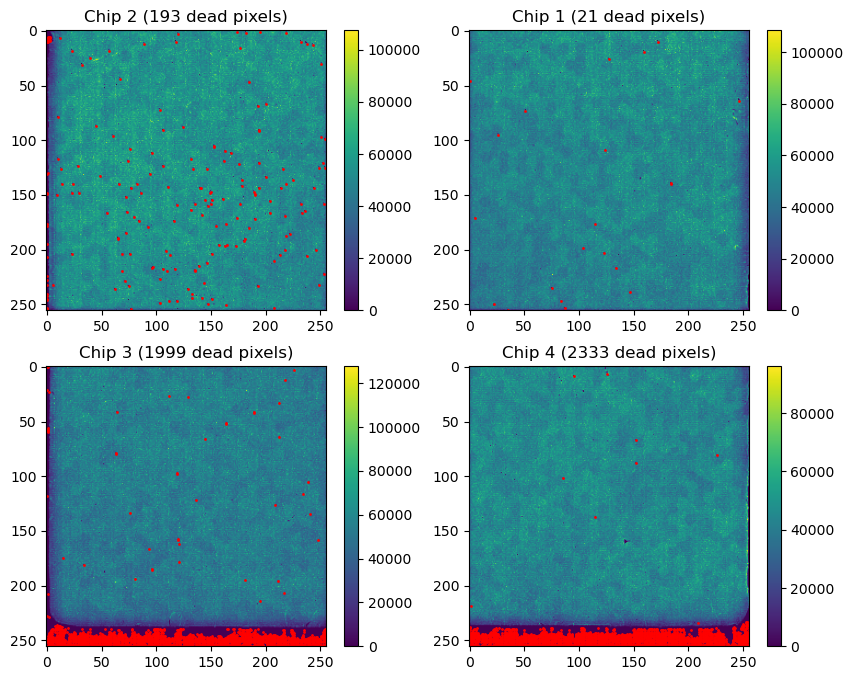

In [11]:
# highlight the dead pixels in each chip
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
im01 = axs[0, 1].imshow(chip1, cmap=cmap)
axs[0, 1].scatter(dead_pixels_chip1[1], dead_pixels_chip1[0], color='r', s=1)
fig.colorbar(im01, ax=axs[0, 1])
axs[0, 1].set_title(f'Chip 1 ({len(dead_pixels_chip1[0])} dead pixels)')
im02 = axs[0, 0].imshow(chip2, cmap=cmap)
axs[0, 0].scatter(dead_pixels_chip2[1], dead_pixels_chip2[0], color='r', s=1)
fig.colorbar(im02, ax=axs[0, 0])
axs[0, 0].set_title(f'Chip 2 ({len(dead_pixels_chip2[0])} dead pixels)')
im03 = axs[1, 0].imshow(chip3, cmap=cmap)
axs[1, 0].scatter(dead_pixels_chip3[1], dead_pixels_chip3[0], color='r', s=1)
fig.colorbar(im03, ax=axs[1, 0])    
axs[1, 0].set_title(f'Chip 3 ({len(dead_pixels_chip3[0])} dead pixels)')
im04 = axs[1, 1].imshow(chip4, cmap=cmap)
axs[1, 1].scatter(dead_pixels_chip4[1], dead_pixels_chip4[0], color='r', s=1)
fig.colorbar(im04, ax=axs[1, 1])
axs[1, 1].set_title(f'Chip 4 ({len(dead_pixels_chip4[0])} dead pixels)')
plt.show()

Dead pixels in Chip 1: 20
Dead pixels in Chip 2: 159
Dead pixels in Chip 3: 37
Dead pixels in Chip 4: 9


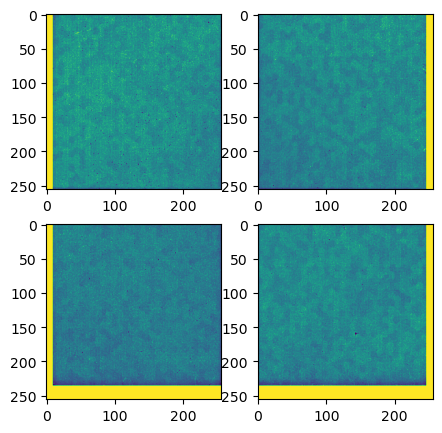

In [24]:
# and if I ignore all the dead pixels on the edge and just focus on the dead pixels in the center

edge_threshold = 10  # pixels from the edge to ignore
bottom_edge = 20 # pixels from the bottom edge to ignore

temp_chip1 = chip1.copy()
temp_chip1[:, -edge_threshold:] = temp_chip1.max()

temp_chip2 = chip2.copy()
temp_chip2[:, 0:edge_threshold] = temp_chip2.max()

temp_chip3 = chip3.copy()
temp_chip3[:, 0:edge_threshold] = temp_chip3.max()
temp_chip3[-bottom_edge:, :] = temp_chip3.max()

temp_chip4 = chip4.copy()
temp_chip4[:, -edge_threshold:] = temp_chip4.max()
temp_chip4[-bottom_edge:, :] = temp_chip4.max()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
axs[0,1].imshow(temp_chip1, cmap='viridis')
axs[0,0].imshow(temp_chip2, cmap='viridis')
axs[1,0].imshow(temp_chip3, cmap='viridis')
axs[1,1].imshow(temp_chip4, cmap='viridis')

dead_pixels_chip1 = np.where(temp_chip1 == 0)
dead_pixels_chip2 = np.where(temp_chip2 == 0)
dead_pixels_chip3 = np.where(temp_chip3 == 0)
dead_pixels_chip4 = np.where(temp_chip4 == 0)

print(f"Dead pixels in Chip 1: {len(dead_pixels_chip1[0])}")
print(f"Dead pixels in Chip 2: {len(dead_pixels_chip2[0])}")
print(f"Dead pixels in Chip 3: {len(dead_pixels_chip3[0])}")
print(f"Dead pixels in Chip 4: {len(dead_pixels_chip4[0])}")

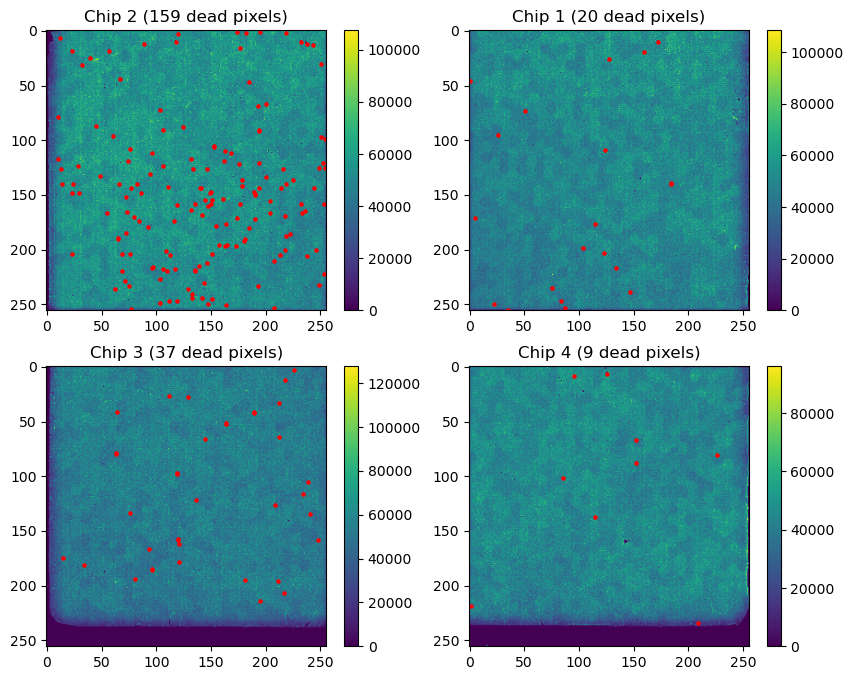

In [30]:
# highlight the dead pixels in each chip
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
im01 = axs[0, 1].imshow(chip1, cmap=cmap)
axs[0, 1].scatter(dead_pixels_chip1[1], dead_pixels_chip1[0], color='r', s=5)
fig.colorbar(im01, ax=axs[0, 1])
axs[0, 1].set_title(f'Chip 1 ({len(dead_pixels_chip1[0])} dead pixels)')
im02 = axs[0, 0].imshow(chip2, cmap=cmap)
axs[0, 0].scatter(dead_pixels_chip2[1], dead_pixels_chip2[0], color='r', s=5)
fig.colorbar(im02, ax=axs[0, 0])
axs[0, 0].set_title(f'Chip 2 ({len(dead_pixels_chip2[0])} dead pixels)')
im03 = axs[1, 0].imshow(chip3, cmap=cmap)
axs[1, 0].scatter(dead_pixels_chip3[1], dead_pixels_chip3[0], color='r', s=5)
fig.colorbar(im03, ax=axs[1, 0])    
axs[1, 0].set_title(f'Chip 3 ({len(dead_pixels_chip3[0])} dead pixels)')
im04 = axs[1, 1].imshow(chip4, cmap=cmap)
axs[1, 1].scatter(dead_pixels_chip4[1], dead_pixels_chip4[0], color='r', s=5)
fig.colorbar(im04, ax=axs[1, 1])
axs[1, 1].set_title(f'Chip 4 ({len(dead_pixels_chip4[0])} dead pixels)')
plt.show()

In [32]:
print("After ignoring the edge dead pixels:")

print(f"Dead pixels in Chip 1: {len(dead_pixels_chip1[0])}")
print(f"Dead pixels in Chip 2: {len(dead_pixels_chip2[0])}")
print(f"Dead pixels in Chip 3: {len(dead_pixels_chip3[0])}")
print(f"Dead pixels in Chip 4: {len(dead_pixels_chip4[0])}")
print(f"Total dead pixels: {len(dead_pixels_chip1[0]) + len(dead_pixels_chip2[0]) + len(dead_pixels_chip3[0]) + len(dead_pixels_chip4[0])}")

After ignoring the edge dead pixels:
Dead pixels in Chip 1: 20
Dead pixels in Chip 2: 159
Dead pixels in Chip 3: 37
Dead pixels in Chip 4: 9
Total dead pixels: 225
